In [179]:
#coding utf8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

features = pd.read_csv('./features.csv') 

In [180]:
features
features = features.dropna()
features

,ref_area.label,Average Unemployment Rate,Average GDP,Advanced Education,Intermediate Education,Inflation,depression,% of young employers(15-24),Average Wages,Average Sleep
1,Belgium,7.253571,709.630729,42.177827,39.241438,1.744923,4.455466,8.075380,64.348333,7.300
6,Denmark,6.200000,829.040914,34.094235,42.263024,1.310386,4.076575,14.700964,59.089167,7.250
7,Estonia,8.298214,248.627246,37.841544,51.711521,2.432025,3.804306,8.789436,54.654167,7.367
8,Finland,7.967857,679.656098,40.308146,46.391953,1.310291,5.973561,11.953550,57.288333,7.500
10,Germany,5.109615,597.360827,27.986583,57.933511,1.326050,4.574229,10.398460,61.931667,7.233
11,Greece,18.985455,448.134528,31.036689,42.366434,0.737302,6.353230,6.087452,56.306667,7.100
12,Hungary,7.175000,201.110727,25.418979,61.879569,2.965742,2.966710,7.116592,50.570000,7.167
13,Iceland,4.892857,643.054452,33.883878,35.812880,4.475821,3.697216,16.232513,61.033333,7.383
14,Ireland,9.978182,987.395038,43.892003,36.972264,0.345551,5.327828,13.158156,45.021667,7.283
15,Italy,10.069643,653.875914,19.741812,46.445320,1.181333,4.216119,6.324784,59.380833,7.083


In [181]:
y = features['Average GDP']
New = features.drop(labels = ['ref_area.label', 'Average GDP'], axis = 1)

In [182]:

X_train, X_test, y_train, y_test = train_test_split(New, 
                                                    y, 
                                                    test_size=0.25,
                                                   random_state = 111)

In [183]:
#Ridge regression
from sklearn.linear_model import Ridge
 
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train, y_train)
y_pred = ridgeR.predict(X_test)
 
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)
 
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

29574.681707640422
                       Columns  Coefficient Estimate
0    Average Unemployment Rate            -37.528426
1           Advanced Education             -9.890715
2       Intermediate Education            -23.001155
3                    Inflation           -102.171721
4                   depression             61.858444
5  % of young employers(15-24)              7.587644
6                Average Wages             -6.422750
7                Average Sleep            -12.740716


Mean squared error on test set 26942.124103475355
                       Columns  Coefficient Estimate
0    Average Unemployment Rate            -41.865265
1           Advanced Education            -10.405068
2       Intermediate Education            -23.135255
3                    Inflation           -106.722454
4                   depression             71.461344
5  % of young employers(15-24)              5.808885
6                Average Wages             -7.351866
7                Average Sleep             -0.000000


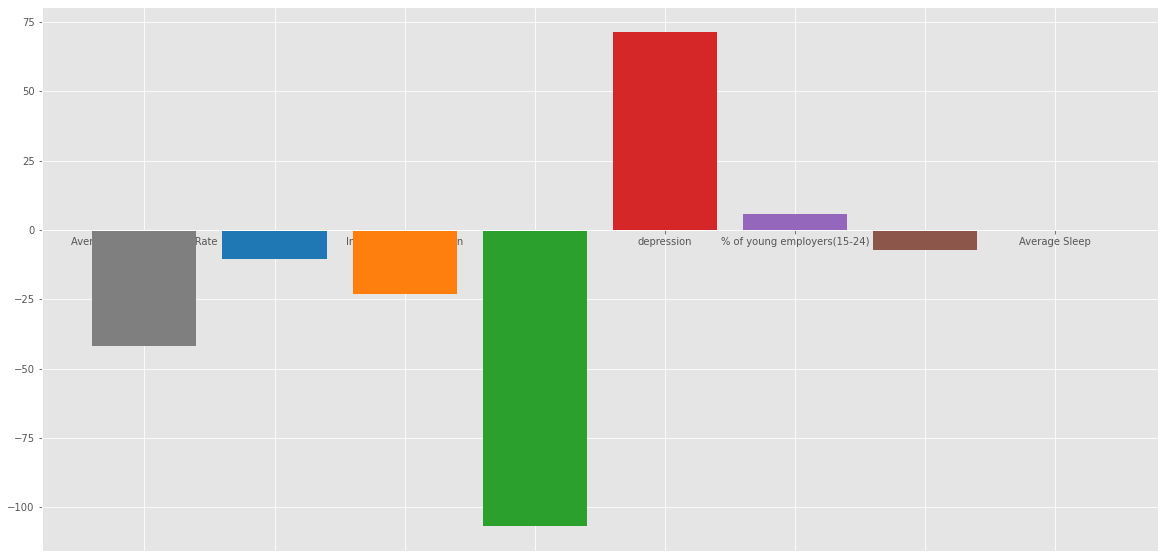

In [184]:
from sklearn.linear_model import Lasso
 
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)
 
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))
 
color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']
 
ax.bar(lasso_coeff["Columns"],
lasso_coeff['Coefficient Estimate'],
color = color)
 
ax.spines['bottom'].set_position('zero')
 
plt.style.use('ggplot')
plt.show()

In [185]:
# import ElasticNet
 
# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(X_train, y_train)
 
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)
 
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = X_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff



Mean Squared Error on test set 46026.850075582624


,Columns,Coefficient Estimate
0,Average Unemployment Rate,-20.741465
1,Advanced Education,-8.332475
2,Intermediate Education,-22.408024
3,Inflation,-76.331676
4,depression,37.461716
5,% of young employers(15-24),11.839414
6,Average Wages,-2.675790
7,Average Sleep,-2.013809


In [186]:
#R2 score
r2_score(y_test,y_pred_elastic)

0.6179555686050485